In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/APPLICATION/BGC GenAI/financial_data.csv')


In [4]:
df

,Company,Fiscal Year,Total Revenue (in billions),Net Income (in billions),Total Assets (in billions),Total Liabilities (in billions),Cash Flow from Operating Activities (in billions)
0,Microsoft,2024,$245.12,$89.00,$410.00,$191.00,$95.00
1,Microsoft,2023,$211.92,$72.74,$364.84,$176.00,$81.00
2,Microsoft,2022,$198.27,$67.45,$333.78,$168.69,$77.00
3,Tesla,2023,$96.77,$12.60,$100.00,$40.00,$15.00
4,Tesla,2022,$81.46,$11.19,$82.00,$35.00,$14.00
5,Tesla,2021,$53.82,$5.52,$62.00,$28.00,$11.00
6,Apple,2024,$391.04,$99.80,$400.00,$200.00,$110.00
7,Apple,2023,$383.29,$94.68,$380.00,$190.00,$105.00
8,Apple,2022,$394.33,$99.80,$350.00,$180.00,$104.00


In [6]:
# Ensure the data is sorted by Company and Fiscal Year
df = df.sort_values(by=['Company', 'Fiscal Year'])

# Clean and convert relevant columns to numeric type
for column in ['Total Revenue (in billions)', 'Net Income (in billions)',
                'Total Assets (in billions)', 'Total Liabilities (in billions)',
                'Cash Flow from Operating Activities (in billions)']:
    # Remove currency symbols and commas, then convert to numeric
    df[column] = df[column].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Calculate percentage changes
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue (in billions)'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income (in billions)'].pct_change() * 100
df['Assets Growth (%)'] = df.groupby('Company')['Total Assets (in billions)'].pct_change() * 100
df['Liabilities Growth (%)'] = df.groupby('Company')['Total Liabilities (in billions)'].pct_change() * 100
df['Cash Flow Growth (%)'] = df.groupby('Company')['Cash Flow from Operating Activities (in billions)'].pct_change() * 100

In [7]:
df

,Company,Fiscal Year,Total Revenue (in billions),Net Income (in billions),Total Assets (in billions),Total Liabilities (in billions),Cash Flow from Operating Activities (in billions),Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
8,Apple,2022,394.33,99.80,350.00,180.00,104.0,NaN,NaN,NaN,NaN,NaN
7,Apple,2023,383.29,94.68,380.00,190.00,105.0,-2.799686,-5.130261,8.571429,5.555556,0.961538
6,Apple,2024,391.04,99.80,400.00,200.00,110.0,2.021968,5.407689,5.263158,5.263158,4.761905
2,Microsoft,2022,198.27,67.45,333.78,168.69,77.0,NaN,NaN,NaN,NaN,NaN
1,Microsoft,2023,211.92,72.74,364.84,176.00,81.0,6.884551,7.842847,9.305531,4.333393,5.194805
0,Microsoft,2024,245.12,89.00,410.00,191.00,95.0,15.666289,22.353588,12.378029,8.522727,17.283951
5,Tesla,2021,53.82,5.52,62.00,28.00,11.0,NaN,NaN,NaN,NaN,NaN
4,Tesla,2022,81.46,11.19,82.00,35.00,14.0,51.356373,102.717391,32.258065,25.000000,27.272727
3,Tesla,2023,96.77,12.60,100.00,40.00,15.0,18.794500,12.600536,21.951220,14.285714,7.142857


<ipython-input-8-139b24d62477>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Total Revenue (in billions)', y='Company', inner='stick', palette='Dark2')


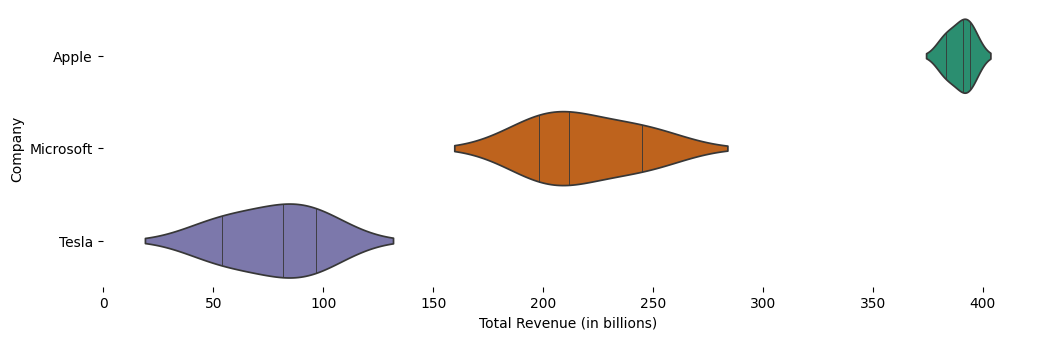

In [8]:
# @title Company vs Total Revenue (in billions)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Company'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Total Revenue (in billions)', y='Company', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# **Financial Trends Analysis Summary**


# **Apple**

 **Revenue & Net Income:**
2022: Base figures with no growth data.
2023: Revenue decreased by ~2.80% and net income fell by ~5.13% compared to 2022, suggesting a temporary contraction.
2024: Revenue rebounded with a 2.02% increase, and net income improved by 5.41%, indicating recovery.

**Assets & Liabilities:**
Steady asset growth (8.57% in 2023, 5.26% in 2024) with a consistent rise in liabilities (5.56% in 2023, 5.26% in 2024), highlighting continued investment and financing.

**Cash Flow:**
Minor fluctuation with a nearly flat growth in 2023 (0.96%) and a stronger rebound (4.76%) in 2024.
Insight: Apple’s performance shows moderate fluctuations—an initial revenue dip followed by recovery. This trend might prompt an AI-powered chatbot to flag short-term revenue risks while highlighting long-term asset growth stability.

# **Microsoft**

**Revenue & Net Income:**
2022: Base figures without growth data.
2023: Revenue increased by ~6.88% and net income by ~7.84%, indicating healthy growth.
2024: Strong performance with revenue up by ~15.67% and net income soaring by ~22.35%.

**Assets & Liabilities:**
Assets grew by ~9.31% in 2023 and ~12.38% in 2024, while liabilities rose moderately (4.33% in 2023 and 8.52% in 2024).
Cash Flow:
Consistent improvements with a 5.19% increase in 2023 and a robust 17.28% jump in 2024.
Insight: Microsoft exhibits steady and accelerating growth across key financial metrics, reflecting strong operational performance. An AI-powered financial chatbot could use this data to emphasize Microsoft’s reliability and robust expansion trends.

# **Tesla**

**Revenue & Net Income:**
2021: Base year with initial figures.
2022: Explosive growth with revenue surging by ~51.36% and net income more than doubling (102.72%), indicating rapid scaling.
2023: Growth moderated to 18.79% for revenue and 12.60% for net income, suggesting a transition from rapid expansion to a steadier pace.

**Assets & Liabilities:**
Significant asset growth (32.26% in 2022, 21.95% in 2023) with liabilities also growing sharply but at a slightly moderated rate (25% in 2022, 14.29% in 2023).
Cash Flow:
Healthy increases, with a 27.27% boost in 2022 followed by a 7.14% increase in 2023.
Insight: Tesla’s data reflects high volatility with rapid scaling in 2022 that moderates in 2023. This suggests the company is stabilizing after a period of aggressive growth. For an AI-powered chatbot, this volatility should be highlighted to alert users to the dynamic nature of Tesla’s financial performance, requiring nuanced risk assessment and real-time monitoring.

# **Overall Recommendations for an AI-Powered Financial Chatbot**

**Comparative Analysis:**
The chatbot should be able to compare growth trends across companies:
Apple: Monitor for short-term revenue dips with long-term recovery.
Microsoft: Emphasize consistent and robust growth.
Tesla: Flag rapid growth phases and subsequent stabilization, which could affect volatility and risk assessments.
Alert System:
Set up alerts for significant percentage changes in key metrics, such as net income or cash flow changes, to provide timely insights.

# **Contextual Insights:**
Integrate narratives explaining how asset and liability trends can affect overall financial health, especially during periods of rapid expansion or contraction.

# **User Customization:**
Allow users to query specific trends (e.g., “Show me Tesla’s revenue trend over the past three years”) to personalize their financial insights.
By incorporating these trends and insights, the AI-powered chatbot can deliver more nuanced financial analysis and timely alerts to users, ultimately enhancing decision-making support.